In [1]:
import mosaic

from stride import *
from stride.utils import wavelets

%matplotlib notebook

In [2]:
# Create the grid
shape = (356, 385)
extra = (50, 50)
absorbing = (40, 40)
spacing = (0.5e-3, 0.5e-3)

space = Space(shape=shape,
              extra=extra,
              absorbing=absorbing,
              spacing=spacing)

start = 0.
step = 0.08e-6
num = 2500

time = Time(start=start,
            step=step,
            num=num)

In [3]:
# Create problem
problem = Problem(name='anastasio2D',
                  space=space, time=time)

In [4]:
# Create medium
vp = ScalarField('vp', grid=problem.grid)
vp.load('data/anastasio2D-TrueModel.h5')

problem.medium.add(vp)

In [5]:
# Create transducers
problem.transducers.default()

In [6]:
# Create geometry
num_locations = 128
problem.geometry.default('elliptical', num_locations)

In [7]:
# Create acquisitions
problem.acquisitions.default()

# Create wavelets
f_centre = 0.50e6
n_cycles = 3

for shot in problem.acquisitions.shots:
    shot.wavelets.data[0, :] = wavelets.tone_burst(f_centre, n_cycles,
                                                   time.num, time.step)

<IPython.core.display.Javascript object>


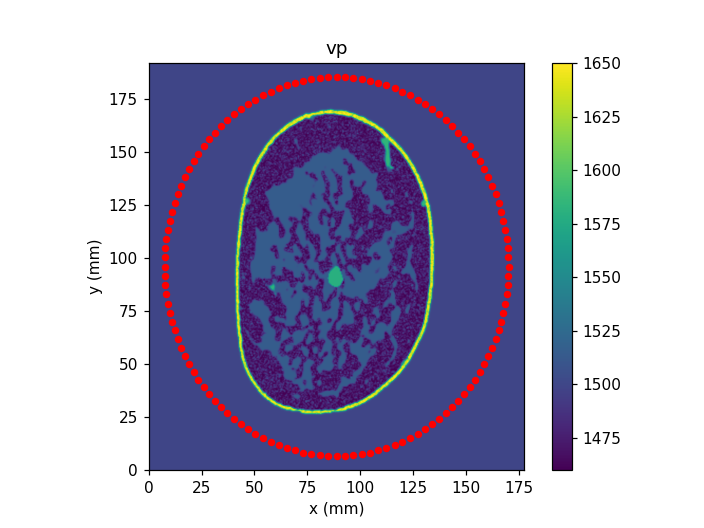

<IPython.core.display.Javascript object>


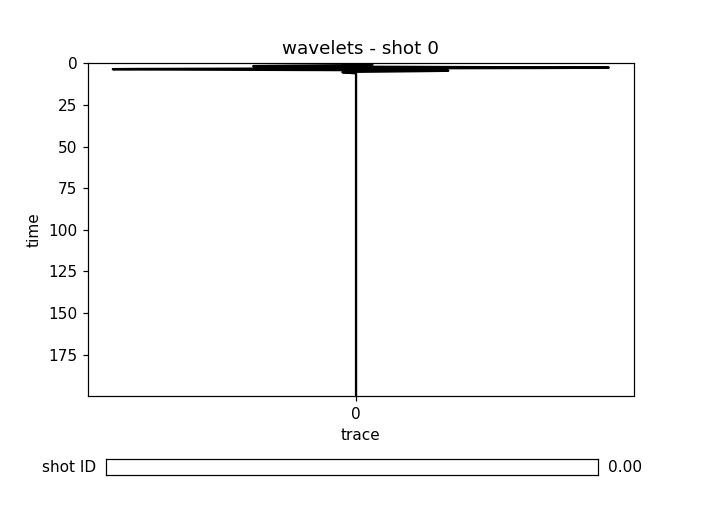

In [8]:
# Plot
problem.plot()

In [9]:
await mosaic.interactive('on')

2021-02-25 16:25:21,550 - INFO       HEAD            Listening at <CommsManager object at 140034246342608, uid=head, address=155.198.98.57, port=3000, state=listening>
2021-02-25 16:25:21,580 - INFO       MONITOR         Listening at <CommsManager object at 140032114120976, uid=monitor, address=155.198.98.57, port=3001, state=listening>
2021-02-25 16:25:21,613 - INFO       NODE:0          Listening at <CommsManager object at 140032114266576, uid=node:0, address=155.198.98.57, port=3002, state=listening>
2021-02-25 16:25:21,660 - INFO       WORKER:0:0      Listening at <CommsManager object at 140032114344720, uid=worker:0:0, address=155.198.98.57, port=3003, state=listening>


In [10]:
# Run
await problem.forward()

2021-02-25 16:25:26,569 - INFO       HEAD            

2021-02-25 16:25:26,571 - INFO       HEAD            Giving shot 0 to worker:0:0
2021-02-25 16:25:26,707 - INFO       WORKER:0:0      (ShotID 0) Preparing to run shot
2021-02-25 16:25:26,708 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:25:26,708 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:25:26,709 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:25:28,810 - INFO       WORKER:0:0      Operator `acoustic_iso_state` configuration:
2021-02-25 16:25:28,813 - INFO       WORKER:0:0      	 * autotuning=['aggressive', 'runtime']
2021-02-25 16:25:28,813 - INFO       WORKER:0:0      	 * develop-mode=False
2021-02-25 16:25:28,813 - INFO       WORKER:0:0      	 * mpi=False
2021-02-25 16:25:28,814 - INFO       WORKER:0:0      	 * log-level=DEBUG
2021-02-25 16:25:28,814 - INFO       WORKER:0:0      	 * subs={h_x: 0.00

2021-02-25 16:25:33,173 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.49 GFlops/s]
2021-02-25 16:25:33,175 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:25:33,177 - INFO       WORKER:0:0      (ShotID 3) Completed state equation run for shot
2021-02-25 16:25:33,240 - INFO       HEAD            Shot 3 retrieved
2021-02-25 16:25:33,497 - INFO       HEAD            Appended traces for shot 3 to observed file
2021-02-25 16:25:33,665 - INFO       HEAD            

2021-02-25 16:25:33,665 - INFO       HEAD            Giving shot 4 to worker:0:0
2021-02-25 16:25:33,833 - INFO       WORKER:0:0      (ShotID 4) Preparing to run shot
2021-02-25 16:25:33,834 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:25:33,834 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:25:

2021-02-25 16:25:38,411 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:25:38,412 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:25:38,412 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:25:38,892 - INFO       WORKER:0:0      (ShotID 8) Running state equation for shot
2021-02-25 16:25:38,892 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:25:38,893 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.39 s
2021-02-25 16:25:38,893 - INFO       WORKER:0:0      Global performance: [OI=2.90, 85.29 GFlops/s, 1.45 GPts/s]
2021-02-25 16:25:38,894 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:25:38,894 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.31 s [OI=2.90, 108.19 GFlops/s, 1.84 GPts/s]
2021-02-25 16:25:38,894 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1

2021-02-25 16:25:43,471 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.31 s [OI=2.90, 107.75 GFlops/s, 1.83 GPts/s]
2021-02-25 16:25:43,472 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:25:43,472 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.02 s [OI=3.84, 0.76 GFlops/s]
2021-02-25 16:25:43,473 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:25:43,473 - INFO       WORKER:0:0      (ShotID 12) Completed state equation run for shot
2021-02-25 16:25:43,572 - INFO       HEAD            Shot 12 retrieved
2021-02-25 16:25:43,860 - INFO       HEAD            Appended traces for shot 12 to observed file
2021-02-25 16:25:44,017 - INFO       HEAD            

2021-02-25 16:25:44,017 - INFO       HEAD            Giving shot 13 t

2021-02-25 16:25:48,847 - INFO       HEAD            Appended traces for shot 16 to observed file
2021-02-25 16:25:48,997 - INFO       HEAD            

2021-02-25 16:25:48,998 - INFO       HEAD            Giving shot 17 to worker:0:0
2021-02-25 16:25:49,159 - INFO       WORKER:0:0      (ShotID 17) Preparing to run shot
2021-02-25 16:25:49,160 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:25:49,160 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:25:49,161 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:25:49,719 - INFO       WORKER:0:0      (ShotID 17) Running state equation for shot
2021-02-25 16:25:49,726 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:25:49,728 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.47 s
2021-02-25 16:25:49,730 - INFO       WORKER:0:0      Global performance: [OI=2.90, 70.71 GFlops

2021-02-25 16:25:54,541 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.36 s
2021-02-25 16:25:54,543 - INFO       WORKER:0:0      Global performance: [OI=2.90, 92.33 GFlops/s, 1.57 GPts/s]
2021-02-25 16:25:54,545 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:25:54,546 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.33 s [OI=2.90, 98.89 GFlops/s, 1.68 GPts/s]
2021-02-25 16:25:54,551 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:25:54,551 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 1.89 GFlops/s]
2021-02-25 16:25:54,552 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:25:54,552 - INFO       WORKER:0:0      (ShotID 21) Completed state equation run for shot
2021-02-25 16

2021-02-25 16:25:58,930 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:25:58,936 - INFO       WORKER:0:0      (ShotID 25) Completed state equation run for shot
2021-02-25 16:25:59,005 - INFO       HEAD            Shot 25 retrieved
2021-02-25 16:25:59,255 - INFO       HEAD            Appended traces for shot 25 to observed file
2021-02-25 16:25:59,403 - INFO       HEAD            

2021-02-25 16:25:59,404 - INFO       HEAD            Giving shot 26 to worker:0:0
2021-02-25 16:25:59,567 - INFO       WORKER:0:0      (ShotID 26) Preparing to run shot
2021-02-25 16:25:59,568 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:25:59,568 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:25:59,568 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:25:59,939 - INFO       WORKER:0:0      (ShotID 26) Running

2021-02-25 16:26:03,856 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:03,856 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:04,284 - INFO       WORKER:0:0      (ShotID 30) Running state equation for shot
2021-02-25 16:26:04,284 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:04,284 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.34 s
2021-02-25 16:26:04,285 - INFO       WORKER:0:0      Global performance: [OI=2.90, 98.11 GFlops/s, 1.67 GPts/s]
2021-02-25 16:26:04,285 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:26:04,286 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.28 s [OI=2.90, 119.48 GFlops/s, 2.03 GPts/s]
2021-02-25 16:26:04,286 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.05 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:04,287 - INFO       WORKER:0:0    

2021-02-25 16:26:08,586 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.03 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:08,587 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.02 s [OI=3.84, 1.45 GFlops/s]
2021-02-25 16:26:08,587 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:08,587 - INFO       WORKER:0:0      (ShotID 34) Completed state equation run for shot
2021-02-25 16:26:08,687 - INFO       HEAD            Shot 34 retrieved
2021-02-25 16:26:08,934 - INFO       HEAD            Appended traces for shot 34 to observed file
2021-02-25 16:26:09,083 - INFO       HEAD            

2021-02-25 16:26:09,084 - INFO       HEAD            Giving shot 35 to worker:0:0
2021-02-25 16:26:09,253 - INFO       WORKER:0:0      (ShotID 35) Preparing to run shot
2021-02-25 16:26:09,253 - INFO    

2021-02-25 16:26:13,398 - INFO       HEAD            

2021-02-25 16:26:13,398 - INFO       HEAD            Giving shot 39 to worker:0:0
2021-02-25 16:26:13,562 - INFO       WORKER:0:0      (ShotID 39) Preparing to run shot
2021-02-25 16:26:13,562 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:13,563 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:13,563 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:13,966 - INFO       WORKER:0:0      (ShotID 39) Running state equation for shot
2021-02-25 16:26:13,968 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:13,970 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.31 s
2021-02-25 16:26:13,971 - INFO       WORKER:0:0      Global performance: [OI=2.90, 106.49 GFlops/s, 1.81 GPts/s]
2021-02-25 16:26:13,973 - INFO       WORKER:0:0      Local performance:
2021-02-

2021-02-25 16:26:18,255 - INFO       WORKER:0:0      Global performance: [OI=2.90, 106.52 GFlops/s, 1.81 GPts/s]
2021-02-25 16:26:18,257 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:26:18,259 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.29 s [OI=2.90, 113.25 GFlops/s, 1.92 GPts/s]
2021-02-25 16:26:18,261 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.02 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:18,262 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 1.85 GFlops/s]
2021-02-25 16:26:18,269 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:18,271 - INFO       WORKER:0:0      (ShotID 43) Completed state equation run for shot
2021-02-25 16:26:18,338 - INFO       HEAD            Shot 43 retrieved
2021-02-25 16:26:18,594 - INFO       

2021-02-25 16:26:22,594 - INFO       WORKER:0:0      (ShotID 47) Completed state equation run for shot
2021-02-25 16:26:22,669 - INFO       HEAD            Shot 47 retrieved
2021-02-25 16:26:22,910 - INFO       HEAD            Appended traces for shot 47 to observed file
2021-02-25 16:26:23,058 - INFO       HEAD            

2021-02-25 16:26:23,059 - INFO       HEAD            Giving shot 48 to worker:0:0
2021-02-25 16:26:23,226 - INFO       WORKER:0:0      (ShotID 48) Preparing to run shot
2021-02-25 16:26:23,227 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:23,227 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:23,228 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:23,660 - INFO       WORKER:0:0      (ShotID 48) Running state equation for shot
2021-02-25 16:26:23,668 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:2

2021-02-25 16:26:28,057 - INFO       WORKER:0:0      (ShotID 52) Running state equation for shot
2021-02-25 16:26:28,057 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:28,058 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.28 s
2021-02-25 16:26:28,058 - INFO       WORKER:0:0      Global performance: [OI=2.90, 119.74 GFlops/s, 2.03 GPts/s]
2021-02-25 16:26:28,058 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:26:28,059 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.27 s [OI=2.90, 125.16 GFlops/s, 2.13 GPts/s]
2021-02-25 16:26:28,059 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.01 s [OI=3.57, 0.03 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:28,060 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.50 GFlops/s]
2021-02-25 16:26:28,060 - INFO       WORKER:0:0      Perform

2021-02-25 16:26:32,361 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.08 GFlops/s]
2021-02-25 16:26:32,367 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:32,369 - INFO       WORKER:0:0      (ShotID 56) Completed state equation run for shot
2021-02-25 16:26:32,444 - INFO       HEAD            Shot 56 retrieved
2021-02-25 16:26:32,677 - INFO       HEAD            Appended traces for shot 56 to observed file
2021-02-25 16:26:32,826 - INFO       HEAD            

2021-02-25 16:26:32,827 - INFO       HEAD            Giving shot 57 to worker:0:0
2021-02-25 16:26:32,993 - INFO       WORKER:0:0      (ShotID 57) Preparing to run shot
2021-02-25 16:26:32,993 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:32,994 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 1

2021-02-25 16:26:37,273 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:37,273 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:37,274 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:37,644 - INFO       WORKER:0:0      (ShotID 61) Running state equation for shot
2021-02-25 16:26:37,645 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:37,645 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.28 s
2021-02-25 16:26:37,646 - INFO       WORKER:0:0      Global performance: [OI=2.90, 119.93 GFlops/s, 2.04 GPts/s]
2021-02-25 16:26:37,646 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:26:37,647 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.24 s [OI=2.90, 137.43 GFlops/s, 2.33 GPts/s]
2021-02-25 16:26:37,647 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500

2021-02-25 16:26:41,995 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.29 s [OI=2.90, 115.82 GFlops/s, 1.97 GPts/s]
2021-02-25 16:26:41,995 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.02 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:41,996 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 1.48 GFlops/s]
2021-02-25 16:26:41,996 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:41,996 - INFO       WORKER:0:0      (ShotID 65) Completed state equation run for shot
2021-02-25 16:26:42,096 - INFO       HEAD            Shot 65 retrieved
2021-02-25 16:26:42,337 - INFO       HEAD            Appended traces for shot 65 to observed file
2021-02-25 16:26:42,486 - INFO       HEAD            

2021-02-25 16:26:42,487 - INFO       HEAD            Giving shot 66 t

2021-02-25 16:26:46,546 - INFO       HEAD            Appended traces for shot 69 to observed file
2021-02-25 16:26:46,695 - INFO       HEAD            

2021-02-25 16:26:46,696 - INFO       HEAD            Giving shot 70 to worker:0:0
2021-02-25 16:26:46,860 - INFO       WORKER:0:0      (ShotID 70) Preparing to run shot
2021-02-25 16:26:46,860 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:46,861 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:46,861 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:47,265 - INFO       WORKER:0:0      (ShotID 70) Running state equation for shot
2021-02-25 16:26:47,271 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:26:47,273 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.31 s
2021-02-25 16:26:47,275 - INFO       WORKER:0:0      Global performance: [OI=2.90, 106.04 GFlop

2021-02-25 16:26:51,814 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.32 s
2021-02-25 16:26:51,816 - INFO       WORKER:0:0      Global performance: [OI=2.90, 104.04 GFlops/s, 1.77 GPts/s]
2021-02-25 16:26:51,817 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:26:51,819 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.28 s [OI=2.90, 116.59 GFlops/s, 1.98 GPts/s]
2021-02-25 16:26:51,821 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.03 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:26:51,822 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.25 GFlops/s]
2021-02-25 16:26:51,824 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:51,826 - INFO       WORKER:0:0      (ShotID 74) Completed state equation run for shot
2021-02-25 

2021-02-25 16:26:56,459 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:26:56,466 - INFO       WORKER:0:0      (ShotID 78) Completed state equation run for shot
2021-02-25 16:26:56,541 - INFO       HEAD            Shot 78 retrieved
2021-02-25 16:26:56,802 - INFO       HEAD            Appended traces for shot 78 to observed file
2021-02-25 16:26:56,951 - INFO       HEAD            

2021-02-25 16:26:56,952 - INFO       HEAD            Giving shot 79 to worker:0:0
2021-02-25 16:26:57,118 - INFO       WORKER:0:0      (ShotID 79) Preparing to run shot
2021-02-25 16:26:57,118 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:26:57,119 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:26:57,119 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:26:57,583 - INFO       WORKER:0:0      (ShotID 79) Running

2021-02-25 16:27:01,548 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:27:01,548 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:27:01,964 - INFO       WORKER:0:0      (ShotID 83) Running state equation for shot
2021-02-25 16:27:01,969 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:01,974 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.32 s
2021-02-25 16:27:01,975 - INFO       WORKER:0:0      Global performance: [OI=2.90, 102.24 GFlops/s, 1.74 GPts/s]
2021-02-25 16:27:01,977 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:01,981 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.31 s [OI=2.90, 106.43 GFlops/s, 1.81 GPts/s]
2021-02-25 16:27:01,983 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.01 s [OI=3.57, 0.03 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:01,985 - INFO       WORKER:0:0   

2021-02-25 16:27:06,341 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.04 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:06,343 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.54 GFlops/s]
2021-02-25 16:27:06,350 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:27:06,352 - INFO       WORKER:0:0      (ShotID 87) Completed state equation run for shot
2021-02-25 16:27:06,427 - INFO       HEAD            Shot 87 retrieved
2021-02-25 16:27:06,662 - INFO       HEAD            Appended traces for shot 87 to observed file
2021-02-25 16:27:06,811 - INFO       HEAD            

2021-02-25 16:27:06,811 - INFO       HEAD            Giving shot 88 to worker:0:0
2021-02-25 16:27:06,973 - INFO       WORKER:0:0      (ShotID 88) Preparing to run shot
2021-02-25 16:27:06,973 - INFO    

2021-02-25 16:27:11,252 - INFO       HEAD            

2021-02-25 16:27:11,252 - INFO       HEAD            Giving shot 92 to worker:0:0
2021-02-25 16:27:11,420 - INFO       WORKER:0:0      (ShotID 92) Preparing to run shot
2021-02-25 16:27:11,420 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:27:11,421 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:27:11,421 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:27:11,818 - INFO       WORKER:0:0      (ShotID 92) Running state equation for shot
2021-02-25 16:27:11,826 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:11,833 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.31 s
2021-02-25 16:27:11,835 - INFO       WORKER:0:0      Global performance: [OI=2.90, 107.91 GFlops/s, 1.83 GPts/s]
2021-02-25 16:27:11,837 - INFO       WORKER:0:0      Local performance:
2021-02-

2021-02-25 16:27:16,051 - INFO       WORKER:0:0      Global performance: [OI=2.90, 105.99 GFlops/s, 1.80 GPts/s]
2021-02-25 16:27:16,052 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:16,052 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.29 s [OI=2.90, 116.45 GFlops/s, 1.98 GPts/s]
2021-02-25 16:27:16,053 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:16,053 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 1.65 GFlops/s]
2021-02-25 16:27:16,053 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:27:16,054 - INFO       WORKER:0:0      (ShotID 96) Completed state equation run for shot
2021-02-25 16:27:16,152 - INFO       HEAD            Shot 96 retrieved
2021-02-25 16:27:16,390 - INFO       

2021-02-25 16:27:20,303 - INFO       WORKER:0:0      (ShotID 100) Completed state equation run for shot
2021-02-25 16:27:20,404 - INFO       HEAD            Shot 100 retrieved
2021-02-25 16:27:20,647 - INFO       HEAD            Appended traces for shot 100 to observed file
2021-02-25 16:27:20,796 - INFO       HEAD            

2021-02-25 16:27:20,797 - INFO       HEAD            Giving shot 101 to worker:0:0
2021-02-25 16:27:20,960 - INFO       WORKER:0:0      (ShotID 101) Preparing to run shot
2021-02-25 16:27:20,961 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:27:20,962 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:27:20,962 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:27:21,378 - INFO       WORKER:0:0      (ShotID 101) Running state equation for shot
2021-02-25 16:27:21,379 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 1

2021-02-25 16:27:25,656 - INFO       WORKER:0:0      (ShotID 105) Running state equation for shot
2021-02-25 16:27:25,662 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:25,664 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.32 s
2021-02-25 16:27:25,666 - INFO       WORKER:0:0      Global performance: [OI=2.90, 103.55 GFlops/s, 1.76 GPts/s]
2021-02-25 16:27:25,668 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:25,669 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.29 s [OI=2.90, 114.32 GFlops/s, 1.94 GPts/s]
2021-02-25 16:27:25,671 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.03 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:25,672 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 1.83 GFlops/s]
2021-02-25 16:27:25,674 - INFO       WORKER:0:0      Perfor

2021-02-25 16:27:29,969 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.01 s [OI=3.84, 2.33 GFlops/s]
2021-02-25 16:27:29,970 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:27:29,971 - INFO       WORKER:0:0      (ShotID 109) Completed state equation run for shot
2021-02-25 16:27:30,056 - INFO       HEAD            Shot 109 retrieved
2021-02-25 16:27:30,307 - INFO       HEAD            Appended traces for shot 109 to observed file
2021-02-25 16:27:30,457 - INFO       HEAD            

2021-02-25 16:27:30,458 - INFO       HEAD            Giving shot 110 to worker:0:0
2021-02-25 16:27:30,622 - INFO       WORKER:0:0      (ShotID 110) Preparing to run shot
2021-02-25 16:27:30,623 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:27:30,623 - INFO       WORKER:0:0      Using DRP scheme
2021-02

2021-02-25 16:27:34,925 - INFO       WORKER:0:0      (ShotID 114) Preparing to run shot
2021-02-25 16:27:34,925 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:27:34,926 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:27:34,926 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:27:35,360 - INFO       WORKER:0:0      (ShotID 114) Running state equation for shot
2021-02-25 16:27:35,360 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:35,361 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.34 s
2021-02-25 16:27:35,361 - INFO       WORKER:0:0      Global performance: [OI=2.90, 97.37 GFlops/s, 1.65 GPts/s]
2021-02-25 16:27:35,361 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:35,362 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.29 s [OI=2.90, 115.64 GFlops/s, 1.96 GPts/s]
2021-02-25

2021-02-25 16:27:39,765 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:39,767 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.37 s [OI=2.90, 90.29 GFlops/s, 1.54 GPts/s]
2021-02-25 16:27:39,769 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.05 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:39,770 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.03 s [OI=3.84, 0.53 GFlops/s]
2021-02-25 16:27:39,772 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:27:39,774 - INFO       WORKER:0:0      (ShotID 118) Completed state equation run for shot
2021-02-25 16:27:39,855 - INFO       HEAD            Shot 118 retrieved
2021-02-25 16:27:40,100 - INFO       HEAD            Appended traces for shot 118 to observed file
2021-02-25 16:27:40,248 - INFO       HEAD         

2021-02-25 16:27:44,164 - INFO       HEAD            Shot 122 retrieved
2021-02-25 16:27:44,397 - INFO       HEAD            Appended traces for shot 122 to observed file
2021-02-25 16:27:44,546 - INFO       HEAD            

2021-02-25 16:27:44,547 - INFO       HEAD            Giving shot 123 to worker:0:0
2021-02-25 16:27:44,712 - INFO       WORKER:0:0      (ShotID 123) Preparing to run shot
2021-02-25 16:27:44,713 - INFO       WORKER:0:0      Estimated bandwidth for the propagated wavelet 0.255-0.735 MHz
2021-02-25 16:27:44,713 - INFO       WORKER:0:0      Using DRP scheme
2021-02-25 16:27:44,713 - INFO       WORKER:0:0      Time grid spacing (0.080 μs) is below OT2 limit (0.136 μs)
2021-02-25 16:27:45,098 - INFO       WORKER:0:0      (ShotID 123) Running state equation for shot
2021-02-25 16:27:45,099 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:45,099 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.29 s
2021-02-25 16:27:45

2021-02-25 16:27:49,404 - WARNING    WORKER:0:0      AutoTuner: could not perform any runs
2021-02-25 16:27:49,407 - INFO       WORKER:0:0      Operator `acoustic_iso_state` ran in 0.29 s
2021-02-25 16:27:49,412 - INFO       WORKER:0:0      Global performance: [OI=2.90, 112.70 GFlops/s, 1.91 GPts/s]
2021-02-25 16:27:49,414 - INFO       WORKER:0:0      Local performance:
2021-02-25 16:27:49,416 - INFO       WORKER:0:0        * section0<2500,456,485> ran in 0.27 s [OI=2.90, 123.48 GFlops/s, 2.10 GPts/s]
2021-02-25 16:27:49,417 - INFO       WORKER:0:0        * section1<<2500,1>,<2500,1>,<2500,1>,<2500,1>,<2500,1>> ran in 0.02 s [OI=3.57, 0.01 GFlops/s, 0.01 GPts/s]
2021-02-25 16:27:49,419 - INFO       WORKER:0:0        * section2<<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>,<2500,128>> ran in 0.02 s [OI=3.84, 1.40 GFlops/s]
2021-02-25 16:27:49,421 - INFO       WORKER:0:0      Performance[mode=advanced] arguments: {'nthreads': 12, 'nthreads_nonaffine': 12}
2021-02-25 16:27:49,423

In [11]:
await mosaic.interactive('off')